## Introduction:

Suppose you and your classmates compute the percentile rank of your birth weights and then compute the CDF of the percentile ranks. 

What do you expect it to look like? 

Hint: what fraction of the class do you expect to be above the median?

## Answer:

1. The CDF and Percentile rank values expected to be the same .. 
As: CDF is exactly equals to the percentile rank except that CDF is a fractional value however, percentile rank is a percentage value .. 

2. As the median is the 50% percentile .. hence, about 50% of the class will be below the median and thus the fraction of the class above the median = 100 - (% of the class below the median) .. 

Reference ==> https://stats.stackexchange.com/questions/132952/is-calculating-a-percentile-the-same-as-evaluating-a-cumulative-density-function

Let's prove those answers above .. using the pregnencies dataset .. however, let's work on the whole column representing babies weights .. without dividing it to first_babies and others ..  

In [1]:
import Cdf
import Pmf
import numpy as np
import random 
import score_example
import itertools
# import pandas as pd
import survey
import first
import matplotlib.pyplot as plt
%matplotlib inline 

score, percentile rank
55 20.0
66 40.0
77 60.0
88 80.0
99 100.0

prank, score, score
0 55 55
20 55 55
25 66 66
40 66 66
50 77 77
60 77 77
75 88 88
80 88 88
100 99 99


/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
table = survey.Pregnancies()
table.ReadRecords()
outcome_ = np.zeros([len(table.records), 1])

for i in xrange(len(table.records)):
    outcome_[i] = table.records[i].outcome

In [3]:
partitions = first.PartitionRecords(table)
partitions  # divide the data to firsts, others .. 

(<survey.Pregnancies at 0x7fd811739f50>,
 <survey.Pregnancies at 0x7fd811739f90>)

In [4]:
## tables 
t = first.MakeTables()
original_table = t[0]
firsts_table = t[1]
others_table = t[2]

original_table, firsts_table, others_table

(<survey.Pregnancies at 0x7fd8116d6090>,
 <survey.Pregnancies at 0x7fd7f5761290>)

In [5]:
len(original_table), len(firsts_table) + len(others_table)

(13593, 9148)

As agreed earlier I gonna work on the whole column of weights .. and it makes more sense to work on the sum of first and others not on the whole table .. which means that we gonna concat the weight column for firsts and others as it implies that these are only alive babies .. however, the whol column contains both alive and non alive babies .. 

In [19]:
first_baby_1 = np.zeros([len(firsts_table.records), 1]) ## oz
first_baby_2 = np.zeros([len(firsts_table.records), 1])  ## lb

for i in xrange(len(firsts_table.records)):
    try:
        first_baby_1[i] = firsts_table.records[i].birthwgt_oz
        first_baby_2[i] = firsts_table.records[i].birthwgt_lb
    except ValueError:
        first_baby_1[i] = 0
        first_baby_2[i] = 0
        
first_baby_ = first_baby_1 + first_baby_2
len(first_baby_)

4413

In [20]:
others_baby_1 = np.zeros([len(others_table.records), 1]) ## oz
others_baby_2 = np.zeros([len(others_table.records), 1])  ## lb

for i in xrange(len(firsts_table.records)):
    try:
        others_baby_1[i] = others_table.records[i].birthwgt_oz
        others_baby_2[i] = others_table.records[i].birthwgt_lb
    except ValueError:
        others_baby_1[i] = 0
        others_baby_2[i] = 0
        
others_baby_ = others_baby_1 + others_baby_2
len(others_baby_)

4735

In [21]:
babies_weights_all = np.append(first_baby_, others_baby_)
np.size(babies_weights_all)   ## reference has to be added (the website link)
babies_weights_all

array([ 21.,  11.,  17., ...,   0.,   0.,   0.])

### Percentile Ranks:

In [22]:
## let's calc the percentile rank .. 

def Percentile_Rank(weigths, your_weight):
    count = 0
    
    for weight in weigths:
        if weight <= your_weight:
            count += 1

    percentile_rank = 100.0 * count / len(weigths)
    
    return percentile_rank

In [23]:
# my_weight = int(random.choice(babies_weights_oz))
perc_rank = []

for weight in babies_weights_all:
    perc_rank.append(Percentile_Rank(babies_weights_all, weight))
    
perc_rank[10:20]

[81.30738959335373,
 31.46042850896371,
 25.79798863139484,
 18.944031482291212,
 64.28727590730215,
 86.91517271534762,
 25.79798863139484,
 8.25317009182335,
 98.27284652383034,
 25.79798863139484]

Note that this is read as a % .. i.e. 99.7% of the population have weights lower than mine .. 

### Now, let's calculate the CDF .. 

In [24]:
merged = list(itertools.chain(*[babies_weights_all]))
len(merged)

9148

In [25]:
cdf_babies = Cdf.MakeCdfFromList(merged)
cdf_babies

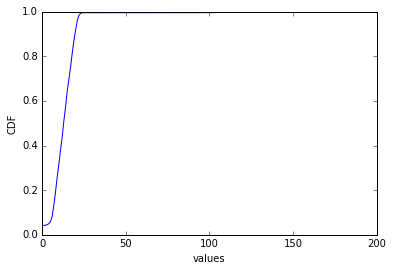

In [26]:
plt.plot(cdf_babies.xs, cdf_babies.ps)
plt.xlabel('values')
plt.ylabel('CDF')

In [27]:
cdf_babies.Items()

[(0.0, 0.041867074770441624),
 (1.0, 0.04197638828159161),
 (2.0, 0.04285089637079143),
 (3.0, 0.045474420638390904),
 (4.0, 0.049519020550940096),
 (5.0, 0.05902929602098819),
 (6.0, 0.08253170091823349),
 (7.0, 0.1315041539134237),
 (8.0, 0.1894403148229121),
 (9.0, 0.2579798863139484),
 (10.0, 0.31460428508963706),
 (11.0, 0.37931788369042413),
 (12.0, 0.4370354175776126),
 (13.0, 0.5092916484477481),
 (14.0, 0.5712724092697857),
 (15.0, 0.6428727590730214),
 (16.0, 0.6954525579361609),
 (17.0, 0.7508745080891999),
 (18.0, 0.8130738959335374),
 (19.0, 0.8691517271534762),
 (20.0, 0.9168124180148667),
 (21.0, 0.9586794927853083),
 (22.0, 0.9827284652383035),
 (23.0, 0.9924573677306515),
 (24.0, 0.9946436379536511),
 (25.0, 0.994862264975951),
 (26.0, 0.994971578487101),
 (57.0, 0.995080891998251),
 (99.0, 0.995190205509401),
 (103.0, 0.9954088325317009),
 (104.0, 0.9959554000874508),
 (105.0, 0.9968299081766506),
 (106.0, 0.9986882378662003),
 (107.0, 0.9994534324442501),
 (108.0, 0.

These values related to CDF are fractions and have to sum to 1

### 2. What Fraction of the class above the median ?!

In [28]:
np.median(babies_weights_all) ## median point

13.0

In [29]:
under_weight_percentile = Percentile_Rank(babies_weights_all, np.median(babies_weights_all))
under_weight_percentile

50.92916484477482

Around 53.69% of the data points are below the weight is 7 ! .. 
Hence the complement are above .. and we can call them (over weighted) babies !

In [30]:
over_weight_percentile = 100 - under_weight_percentile
over_weight_percentile

49.07083515522518

Around 46.3% of the babies are above the median !